# Assignment 11

Welcome to the assignment for week 11.

## Task 11: Pose Estimation

In this assignment, we look at the OpenPose algorithm (https://arxiv.org/pdf/1812.08008.pdf). Instinctively, we could recognize the human pose by making a network that performs a segmentation on each articulation of the body. Then, we would need to link all the joints to create a digital skeleton. For instance, if multiple persons are in the same image, how do you link the one neck with the correct head?

The idea behind this algorithm is to have two different maps:
* Part Affinity Field (PAFs) - 2D Vector field
* Part Confidence Maps (PCMs) - Confidence Score per Pixel

In the following image, you can see the OpenPose model structure. Branch 1 and 2 are creating PCMs and PAFs, respectively. This is done through multiple stages.

In [1]:
from IPython.display import Image
Image(url="https://www.researchgate.net/publication/332669619/figure/fig5/AS:751775762092034@1556248717717/Part-Affinity-Fields-Architecture-Figure-1.ppm")

The the image below, (b) and (c) show the PCMs and PAFs. Afterward, a 'non-neural' postprocessing is used to link the joints and create the skeleton.

In [2]:
Image(url= "https://miro.medium.com/v2/resize:fit:1400/0*RiQ9rkWEtPR0uVfx.png")

### Task 11.1 Setup the network and modify it.

We will use a pre-trained network to do our work. The code is in the folder "/openpose". You should first download the weights of the network. You will find two files
* "body_pose_model.pth" (199.57Mb) 
* "hand_pose_model.pth" (140.52Mb)

using this link (https://www.dropbox.com/sh/7xbup2qsn7vvjxo/AABWFksdlgOMXR_r5v3RwKRYa?dl=0). Place them into a "/model" folder you create. Afterward, the few lines below should run perfectly.

We want you to get into the code for the network in the folder "/openpose/body.py," and you should modify it to access the PCM and PAF. Remember, like for the segmentation, there are as many layers as there are labels, i.e., key points. 

Your first task is to overlay the original image for each image in "/images/weirdos_filtered/" with each map separately to visualize the model's outputs, i.e., plot the PAF and PCM for each of those images. **(RESULT)**

In [3]:
# You might need to install these first:
# !pip install opencv-python
# !pip install scikit-image

import sys
sys.path.insert(0, 'openpose')
import cv2
import model
import util
from hand import Hand
from body import Body
import matplotlib.pyplot as plt
import copy
import numpy as np
import torch
import glob
import os

body_estimation = Body('model/body_pose_model.pth')
hand_estimation = Hand('model/hand_pose_model.pth')

part={
    "nose":0,
    "neck":1,
    "right_shldr":2,
    "right_elbw":3,
    "right_wrst":4,
    "left_shldr":5,
    "left_elbw":6,
    "left_wrst":7,
    "right_hps":8,
    "right_kn":9,
    "right_nkl":10,
    "left_hps":11,
    "left_kn":12,
    "left_nkl":13,
    "right_eye":14,
    "left_eye":15,
    "right_hear":16,
    "left_hear":17
}

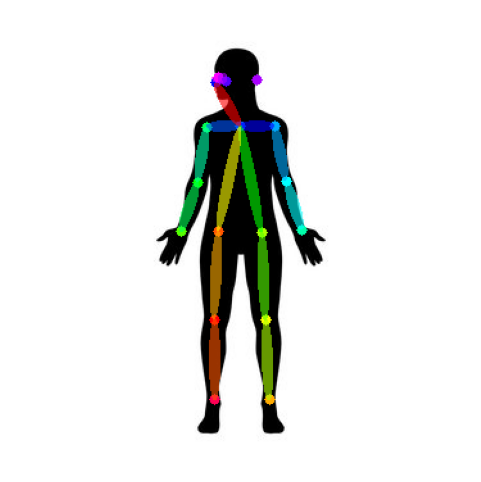

In [4]:
test_image = 'images/demo.jpg'

def estimate_plot(filename):
    objtohighlight = part["neck"]
    oriImg = cv2.imread(filename)  # B,G,R order
    candidate, subset = body_estimation(oriImg)
    canvas = copy.deepcopy(oriImg)
    canvas = util.draw_bodypose(canvas, candidate, subset)
    
    plt.figure(figsize=(6, 6))
    plt.imshow(canvas[:, :, [2, 1, 0]])
    plt.axis('off')
    plt.show()
    
estimate_plot(test_image)

In [5]:
# code here

### Task 11.2 Investigate wrong detections

Now, try to find at which point the algorithm went wrong based on the model's output. If you have ideas of tools to investigate this properly, do not hesitate to use them.
* Report on each weirdo image, what went wrong, and why you think that is. **(RESULT)**

In [6]:
# code here

## Congratz, you made it! :)